In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/time_series_covid19_confirmed_global (1).csv')
df = df.drop(df.columns[[0, 2, 3]], axis=1)
df= df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/23/21,54559,71441,105369,9499,19367,195,1862192,165909,118,5087,98,1303,596,234,20436,894,403512,228688,8101,99456,531326,1341,235859,691854,11722,3643,854,199989,119420,19654,8816254,175,214696,9967,137098,1438,13414,458,29617,120330,...,2499560,57587,28522,8000,547166,509279,13557,884,13308,509,13302,64,4636,7462,195314,2424328,25016816,39044,1227723,274376,15,686,114,383,3430,35,3935,432,13,1244,3617459,36967,78317,1,123245,1548,155006,2118,44592,31007
1/24/21,54595,72274,105596,9549,19399,198,1867223,166036,118,5090,98,1305,596,234,20442,894,404714,228975,8101,99817,531799,1387,237611,693666,11750,3643,855,201037,119420,19654,8844577,175,214817,10038,137574,1472,13489,458,29617,120793,...,2499560,58430,28522,8057,547166,509279,13628,889,13308,509,13500,67,4662,7473,197373,2429605,25147891,39149,1231965,277955,15,686,114,383,3463,35,3966,432,13,1287,3647463,37633,78375,1,123709,1548,155414,2118,45337,31320
1/25/21,54672,72812,105854,9596,19476,201,1874801,166094,118,5091,98,1305,596,234,20443,895,405723,229032,8133,100230,532401,1401,238635,694858,11770,3643,856,202818,120143,20658,8871393,175,215589,10103,137957,1479,13557,460,29617,121535,...,2593382,59167,28522,8112,547166,513599,13697,889,13308,509,14646,67,4682,7490,198636,2435247,25298986,39188,1234772,281546,15,686,114,383,3486,35,3992,432,13,1287,3669658,38041,78429,1,124112,1549,155884,2118,46146,31646
1/26/21,54750,73691,106097,9638,19553,201,1885210,166232,118,5093,98,1306,596,234,20444,897,407140,229358,8140,100689,532916,1401,239482,696642,11788,3643,856,205208,120532,20658,8933356,176,216416,10157,138368,1481,13619,460,29617,121901,...,2629817,59922,28522,8174,556289,515483,13762,890,13308,509,14646,67,4682,7496,200662,2442350,25445583,39261,1237810,285147,16,688,114,383,3499,41,4024,432,13,1312,3689746,38680,78471,1,124525,1551,156393,2119,47622,32004


In [ ]:
#df =df[["Country/Region","Afghanistan"]]
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header# df.iloc[0,0]

In [ ]:
df1 = df['US']
df1

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
1/23/21    25016816
1/24/21    25147891
1/25/21    25298986
1/26/21    25445583
1/27/21    25598061
Name: US, Length: 372, dtype: object

In [ ]:
# a=[]
# if len(df1.columns)>2:
#   df1 = df1.sum(axis = 1)
#   a.append(df1[0])
#   for i in range(len(df1)-1):
#       a.append(df1[i+1]-df1[i])
#   df1 = df1.reset_index()
#   df1.columns =["date","cases"]
#   df1["cases"]=a

In [ ]:
df1 = df1.reset_index()
df1.columns =["date","cases"]

ValueError: ignored

In [ ]:
df1

Country/Region,index,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China
0,1/22/20,1,14,6,1,0,26,2,1,4,1,0,5,0,444,4,0,1,2,0,2,1,1,0,0,2,9,1,5,4,0,0,1,10
1,1/23/20,9,22,9,5,2,32,5,3,5,1,2,5,2,444,9,0,5,7,1,3,2,1,0,3,6,16,1,8,4,0,2,2,27
2,1/24/20,15,36,27,10,2,53,23,3,8,2,4,9,2,549,24,1,9,18,3,4,2,2,0,5,15,20,1,15,8,0,2,5,43
3,1/25/20,39,41,57,18,4,78,23,4,19,8,9,32,5,761,43,7,18,18,4,17,2,3,1,15,27,33,6,28,10,0,3,11,62
4,1/26/20,60,68,75,35,7,111,36,5,22,13,15,83,8,1058,69,7,33,36,4,21,5,4,1,22,46,40,9,44,14,0,4,16,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1/23/21,994,1025,591,534,183,2104,267,147,171,1283,1359,1303,10009,68150,1027,366,691,935,363,397,47,75,18,534,866,1641,237,866,336,1,980,231,1316
368,1/24/21,994,1028,591,535,183,2106,267,147,171,1294,1394,1303,10085,68150,1027,366,691,935,430,397,47,75,18,534,866,1644,237,866,338,1,980,231,1316
369,1/25/21,994,1030,591,536,183,2108,267,147,171,1299,1447,1303,10158,68150,1028,366,691,935,437,397,47,75,18,535,866,1654,237,866,338,1,980,231,1316
370,1/26/21,994,1034,591,536,187,2115,267,147,171,1306,1476,1303,10222,68150,1028,366,692,935,451,397,47,75,18,535,866,1660,237,867,340,1,980,231,1316


In [ ]:
df1['date'] =  pd.to_datetime(df1['date']).dt.strftime('%Y-%m-%d')

In [ ]:
df2 = df1.loc[(df1['date']>='2021-01-01') & (df1['date']<'2021-01-27')]

In [ ]:
df2

,date,cases
345,2021-01-01,10286709
346,2021-01-02,10323965
347,2021-01-03,10340469
348,2021-01-04,10356844
349,2021-01-05,10374932
350,2021-01-06,10395278
351,2021-01-07,10413417
352,2021-01-08,10413417
353,2021-01-09,10450284
354,2021-01-10,10466595


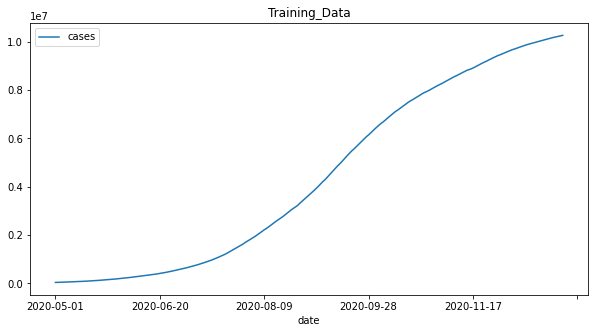

In [ ]:
df1 = df1.loc[(df1['date']>='2020-05-01') & (df1["date"]<"2020-12-31")]
df1.plot.line("date","cases",figsize=(10,5),title="Training_Data")

In [ ]:
df1['cases'] = df1['cases'].diff()
df1 = df1.fillna(method='backfill')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,date,cases
100,2020-05-01,2442
101,2020-05-02,2442
102,2020-05-03,2806
103,2020-05-04,3932
104,2020-05-05,2963
...,...,...
339,2020-12-26,18732
340,2020-12-27,20021
341,2020-12-28,16432
342,2020-12-29,20549


In [ ]:
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)

In [ ]:
df1

,date,cases
0,2020-05-01,2442
1,2020-05-02,2442
2,2020-05-03,2806
3,2020-05-04,3932
4,2020-05-05,2963
...,...,...
239,2020-12-26,18732
240,2020-12-27,20021
241,2020-12-28,16432
242,2020-12-29,20549


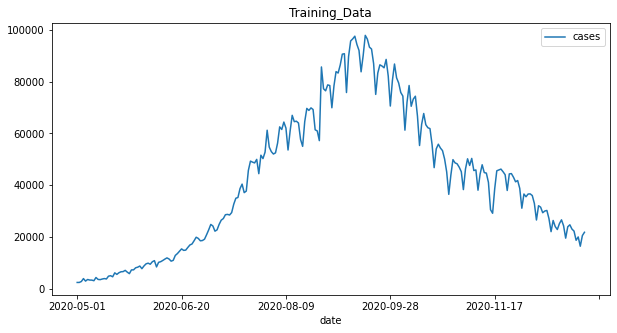

In [ ]:
df1.plot.line("date","cases",figsize=(10,5),title="Training_Data")

In [ ]:
#df1['cases'] = df1['cases'].diff()
#df1 = df1.fillna(method='backfill')

In [ ]:
df1

,date,cases
0,2020-05-01,2442
1,2020-05-02,2442
2,2020-05-03,2806
3,2020-05-04,3932
4,2020-05-05,2963
...,...,...
239,2020-12-26,18732
240,2020-12-27,20021
241,2020-12-28,16432
242,2020-12-29,20549


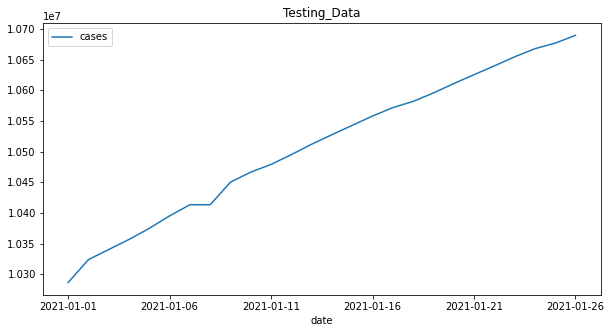

In [ ]:
df2.plot.line("date","cases",figsize=(10,5),title="Testing_Data")

In [ ]:
df2['cases'] = df2['cases'].diff()
df2 = df2.fillna(method='backfill')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2

,date,cases
345,2021-01-01,37256
346,2021-01-02,37256
347,2021-01-03,16504
348,2021-01-04,16375
349,2021-01-05,18088
350,2021-01-06,20346
351,2021-01-07,18139
352,2021-01-08,0
353,2021-01-09,36867
354,2021-01-10,16311


In [ ]:
#df2['cases'] = df2['cases'].diff()
#df2 = df2.fillna(method='backfill')
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)

In [ ]:
df2

,date,cases
0,2021-01-01,37256
1,2021-01-02,37256
2,2021-01-03,16504
3,2021-01-04,16375
4,2021-01-05,18088
5,2021-01-06,20346
6,2021-01-07,18139
7,2021-01-08,0
8,2021-01-09,36867
9,2021-01-10,16311


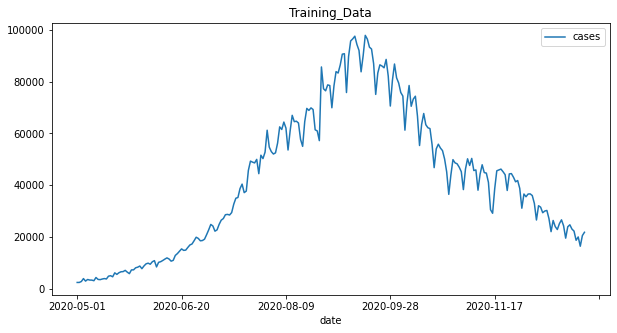

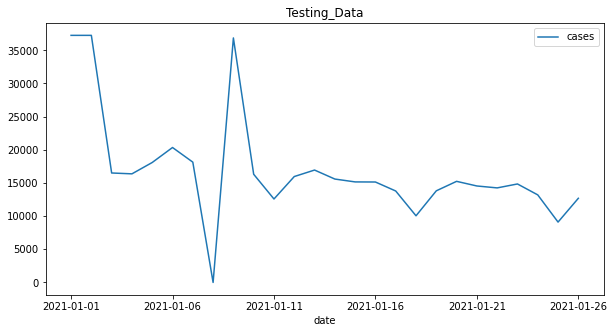

In [ ]:
#october = df1.loc[(df1["date"]>="2020-10-01") & (df1["date"]<"2020-11-01")]
#november = df1.loc[(df1["date"]>="2020-11-01") & (df1["date"]<"2020-12-01")]
#december = df1.loc[(df1["date"]>="2020-12-01") & (df1["date"]<"2021-01-01")]
#last_quarter = df1.loc[(df1["date"]>="2020-1-01") & (df1["date"]<"2021-01-01")]
#df1 = df1.loc[(df1['date']>='2020-05-01') & (df1["date"]<"2020-12-31")]

#october.plot.line("date","cases",figsize=(10,5),title="October")
#november.plot.line("date","cases",figsize=(10,5),title="November")
#december.plot.line("date","cases",figsize=(10,5),title="December")
#last_quarter.plot.line("date","cases",figsize=(10,5),title="Last Quarter")
df1.plot.line("date","cases",figsize=(10,5),title="Training_Data")
#df2 = df1.loc[(df1['date']>='2021-01-01') & (df1['date']<'2021-01-27')]
df2.plot.line("date","cases",figsize=(10,5),title="Testing_Data")

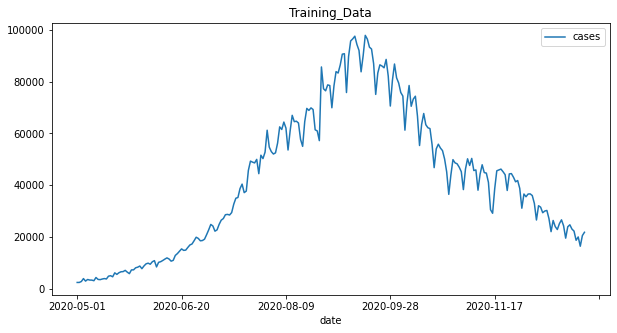

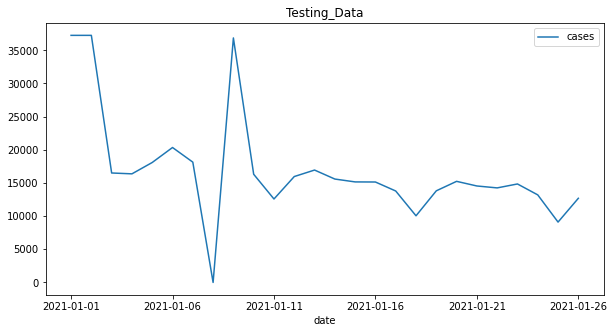

In [ ]:
df1.plot.line("date","cases",figsize=(10,5),title="Training_Data")
#df2 = df1.loc[(df1['date']>='2021-01-01') & (df1['date']<'2021-01-27')]
df2.plot.line("date","cases",figsize=(10,5),title="Testing_Data")

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df1['cases'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=4747.406, Time=0.58 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4973.927, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=4924.973, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=4786.607, Time=0.54 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=4743.536, Time=0.46 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=4779.618, Time=0.17 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=4777.334, Time=0.20 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=inf, Time=1.06 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=4745.517, Time=0.59 sec

Best model:  ARIMA(3,2,2)(0,0,0)[0]          
Total fit time: 

In [ ]:
df1 = np.asarray(df1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(df1['cases'],order=(3,2,2))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.cases   No. Observations:                  242
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -2364.413
Method:                       css-mle   S.D. of innovations           4198.622
Date:                Sat, 30 Jan 2021   AIC                           4742.825
Time:                        16:34:46   BIC                           4767.248
Sample:                             2   HQIC                          4752.664
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8352     15.356     -0.120      0.905     -31.933      28.263
ar.L1.D2.cases     0.4278      0.084      5.120      0.000       0.264       0.592
ar.L2.D2.cases    -0.2462      0.069

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


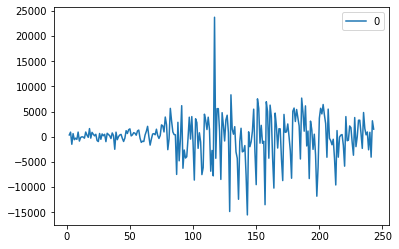

In [ ]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

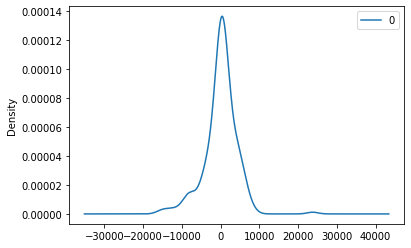

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

,0
count,242.000000
mean,-3.628560
std,4208.378597
min,-15521.532426
25%,-1256.349380
50%,388.767763
75%,1966.201537
max,23753.242209


In [ ]:
from datetime import datetime
start_index = len(df2)-25
end_index = len(df2)
forecast = results.predict(start=start_index , end=end_index)

#pred = results.predict(,end=datetime.datetime(2021, 01, 26),typ='levels').rename('ARIMA PREDICTIONS')

ValueError: ignored

In [ ]:
forecast

1     -301.279110
2    -1838.861851
3      203.888273
4      459.980709
5       50.879604
6     1694.857214
7     -856.636454
8    -1264.444197
9    -3591.823715
10    1471.932795
11    2965.902456
12   -1636.536338
13    4184.530404
14   -2138.013370
15    -602.186992
16   -3514.374953
17    3401.095647
18    -855.973565
19    1232.964262
20    1675.636729
21   -1916.200376
22   -1587.990214
23    -210.922512
24    -354.486030
25    1164.840291
26    1164.840291
dtype: float64

In [ ]:
df2['cases'] = df2['cases'].diff(periods=-1)

In [ ]:
df2

,date,cases
0,2021-01-01,0.0
1,2021-01-02,91726.0
2,2021-01-03,24766.0
3,2021-01-04,-49736.0
4,2021-01-05,-20391.0
5,2021-01-06,-22821.0
6,2021-01-07,-15306.0
7,2021-01-08,30070.0
8,2021-01-09,48693.0
9,2021-01-10,-682.0


In [ ]:
df2 = df2.fillna(method='ffill')

In [ ]:
df2

,date,cases
0,2021-01-01,0.0
1,2021-01-02,91726.0
2,2021-01-03,24766.0
3,2021-01-04,-49736.0
4,2021-01-05,-20391.0
5,2021-01-06,-22821.0
6,2021-01-07,-15306.0
7,2021-01-08,30070.0
8,2021-01-09,48693.0
9,2021-01-10,-682.0


In [ ]:
forecast = forecast.diff(periods=-1)

In [ ]:
forecast

1     -301.279110
2    -1838.861851
3      203.888273
4      459.980709
5       50.879604
6     1694.857214
7     -856.636454
8    -1264.444197
9    -3591.823715
10    1471.932795
11    2965.902456
12   -1636.536338
13    4184.530404
14   -2138.013370
15    -602.186992
16   -3514.374953
17    3401.095647
18    -855.973565
19    1232.964262
20    1675.636729
21   -1916.200376
22   -1587.990214
23    -210.922512
24    -354.486030
25    1164.840291
26            NaN
dtype: float64

In [ ]:
forecast = forecast.fillna(method='ffill')

In [ ]:
forecast

1     -301.279110
2    -1838.861851
3      203.888273
4      459.980709
5       50.879604
6     1694.857214
7     -856.636454
8    -1264.444197
9    -3591.823715
10    1471.932795
11    2965.902456
12   -1636.536338
13    4184.530404
14   -2138.013370
15    -602.186992
16   -3514.374953
17    3401.095647
18    -855.973565
19    1232.964262
20    1675.636729
21   -1916.200376
22   -1587.990214
23    -210.922512
24    -354.486030
25    1164.840291
26    1164.840291
dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
Metric = r2_score(df2['cases'], forecast)

In [ ]:
Metric

-0.09046450134528694

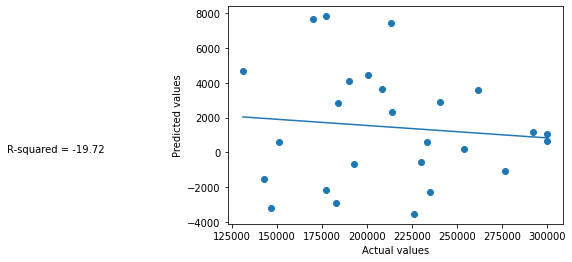

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r_squared = Metric
plt.scatter(df2['cases'],forecast)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(df2['cases']), np.poly1d(np.polyfit(df2['cases'], forecast, 1))(np.unique(df2['cases'])))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % r_squared)
plt.show()

In [ ]:
afrom pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = read_csv('dataset.csv', header=0)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1